# Streamlit Dev

### Saving Product Metadata

In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
import pandas as pd

pd.set_option('display.max_columns',100)


##Load in the data
import json
with open("config/filepaths.json") as f:
    FPATHS = json.load(f)


import joblib
df = joblib.load(FPATHS['data']['processed-nlp']['processed-reviews-with-target_joblib'])
df

,asin,reviewerID,reviewText,summary,overall,year,title,brand,category,review-text-full,review-text-full_raw,tokens-dirty,tokens,lemmas,tokens-dirty-joined,tokens-joined,lemmas-joined,target-rating
0,B007JINB0W,A3Y51NV9HU5T2,"Great pasta taste and feel, but the spell in t...",Four Stars,4,2018,"Miracle Noodle Zero Carb, Gluten Free Shiratak...",Miracle Noodle,Grocery & Gourmet Food; Pasta & Noodles; Noodl...,"Four Stars: Great pasta taste and feel, but th...","Four Stars: Great pasta taste and feel, but th...","[four, stars, great, pasta, taste, and, feel, ...","[stars, great, pasta, taste, feel, spell, pack...","[star, great, pasta, taste, feel, spell, packa...",four stars great pasta taste and feel but the ...,stars great pasta taste feel spell packaged sk...,star great pasta taste feel spell package skrong,None
1,B007JINB0W,A3D7EFSRC6Y9MP,The texture just made it a little strange to e...,Okay but don't like texture,3,2014,"Miracle Noodle Zero Carb, Gluten Free Shiratak...",Miracle Noodle,Grocery & Gourmet Food; Pasta & Noodles; Noodl...,Okay but don't like texture: The texture just ...,Okay but don't like texture: The texture just ...,"[okay, but, do, n't, like, texture, the, textu...","[okay, like, texture, texture, little, strange...","[okay, like, texture, texture, little, strange...",okay but do n't like texture the texture just ...,okay like texture texture little strange eat f...,okay like texture texture little strange eat f...,None
2,B007JINB0W,A4AM5KBP3I2R,The herb flavor makes the odd texture of shira...,Go for the green noodles,5,2018,"Miracle Noodle Zero Carb, Gluten Free Shiratak...",Miracle Noodle,Grocery & Gourmet Food; Pasta & Noodles; Noodl...,Go for the green noodles: The herb flavor make...,Go for the green noodles: The herb flavor make...,"[go, for, the, green, noodles, the, herb, flav...","[green, noodles, herb, flavor, makes, odd, tex...","[green, noodle, herb, flavor, make, odd, textu...",go for the green noodles the herb flavor makes...,green noodles herb flavor makes odd texture sh...,green noodle herb flavor make odd texture shir...,High
3,B007JINB0W,A3GHK4IL78DB7Y,I didn't have a problem at all with a half fil...,Its an awesome substitute.,5,2018,"Miracle Noodle Zero Carb, Gluten Free Shiratak...",Miracle Noodle,Grocery & Gourmet Food; Pasta & Noodles; Noodl...,Its an awesome substitute.: I didn't have a pr...,Its an awesome substitute.: I didn't have a pr...,"[its, an, awesome, substitute, i, did, n't, ha...","[awesome, substitute, problem, half, filled, b...","[awesome, substitute, problem, half, fill, bag...",its an awesome substitute i did n't have a pro...,awesome substitute problem half filled bag use...,awesome substitute problem half fill bag user ...,High
4,B007JINB0W,AH3B94LQOPPY6,They taste like whatever you cook them with.,Five Stars,5,2016,"Miracle Noodle Zero Carb, Gluten Free Shiratak...",Miracle Noodle,Grocery & Gourmet Food; Pasta & Noodles; Noodl...,Five Stars: They taste like whatever you cook ...,Five Stars: They taste like whatever you cook ...,"[five, stars, they, taste, like, whatever, you...","[stars, taste, like, cook]","[star, taste, like, cook]",five stars they taste like whatever you cook t...,stars taste like cook,star taste like cook,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358,B007JINB0W,A73IG1ED6S0JR,Product arrived with two of the bags punctured...,would not recomend,1,2016,"Miracle Noodle Zero Carb, Gluten Free Shiratak...",Miracle Noodle,Grocery & Gourmet Food; Pasta & Noodles; Noodl...,would not recomend: Product arrived with two o...,would not recomend: Product arrived with two o...,"[would, not, recomend, product, arrived, with,...","[recomend, product, arrived, bags, punctured, ...","[recomend, product, arrive, bag, puncture, sme...",would not recomend product arrived with two of...,recomend product arrived bags punctured smells...,recomend product arrive bag puncture smell bad,Low
4359,B007JINB0W,A1XZ2H0MYG54M0,Ok.,Fiv

In [3]:
meta_df = pd.read_csv(FPATHS['data']['subset']['metadata_csv'])
meta_df.head()

,asin,category,description,title,brand,feature,rank,main_cat,price,imageURL,imageURLHighRes,details,Category_Beverages,"Category_Bottled Beverages, Water & Drink Mixes",Category_Candy & Chocolate,"Category_Canned, Jarred & Packaged Foods",Category_Coffee,"Category_Coffee, Tea & Cocoa",Category_Cooking & Baking,Category_Grocery & Gourmet Food,"Category_Herbs, Spices & Seasonings","Category_Sauces, Gravies & Marinades",Category_Snack Foods,Category_Tea,category_list
0,B00BUKL666,Grocery & Gourmet Food; Snack Foods; Bars; Nut...,'These bars are where our journey started and ...,"KIND Bars, Dark Chocolate Nuts &amp; Sea Salt,...",KIND,NaN,18 in Grocery & Gourmet Food (,Grocery,$13.67,'https://images-na.ssl-images-amazon.com/image...,'https://images-na.ssl-images-amazon.com/image...,{'\\n Product Dimensions: \\n ': '6.8 x ...,0,0,0,0,0,0,0,1,0,0,1,0,"['Grocery & Gourmet Food', 'Snack Foods', 'Bar..."
1,B008QMX2SG,Grocery & Gourmet Food; Snack Foods; Bars; Nut...,'These bars are where our journey started and ...,"Kind Bars, Madagascar Vanilla Almond, Gluten F...",KIND,NaN,"2,949 in Grocery & Gourmet Food (",Grocery,$14.79,'https://images-na.ssl-images-amazon.com/image...,'https://images-na.ssl-images-amazon.com/image...,{'\\n Product Dimensions: \\n ': '2 x 4 ...,0,0,0,0,0,0,0,1,0,0,1,0,"['Grocery & Gourmet Food', 'Snack Foods', 'Bar..."
2,B00D3M2QP4,Grocery & Gourmet Food; Breakfast Foods; Break...,'These bars are where our journey started and ...,"KIND Bars, Dark Chocolate Chili Almond, Gluten...",KIND,NaN,"4,575 in Grocery & Gourmet Food (",Grocery,$15.53,'https://images-na.ssl-images-amazon.com/image...,'https://images-na.ssl-images-amazon.com/image...,{'\\n Product Dimensions: \\n ': '7 x 6 ...,0,0,0,0,0,0,0,1,0,0,0,0,"['Grocery & Gourmet Food', 'Breakfast Foods', ..."
3,B00542YXFW,"Grocery & Gourmet Food; Beverages; Coffee, Tea...","'Mild, but round and full licorice flavor and ...","Davidson's Tea Bulk, Anise Seed, 16-Ounce Bag",Davidson's Tea,NaN,"100,853 in Grocery & Gourmet Food (",Grocery,$15.00,'https://images-na.ssl-images-amazon.com/image...,'https://images-na.ssl-images-amazon.com/image...,"{'Shipping Weight:': '1.1 pounds (', 'Domestic...",1,0,0,0,0,1,0,1,0,0,0,1,"['Grocery & Gourmet Food', 'Beverages', 'Coffe..."
4,B000F4DKAI,"Grocery & Gourmet Food; Beverages; Coffee, Tea...",'First started as much needed refreshment betw...,Twinings of London English Afternoon Black Tea...,Twinings,NaN,"19,796 in Grocery & Gourmet Food (",Grocery,$23.70,'https://images-na.ssl-images-amazon.com/image...,'https://images-na.ssl-images-amazon.com/image...,"{'Shipping Weight:': '1.3 pounds (', 'Domestic...",1,0,0,0,0,1,0,1,0,0,0,1,"['Grocery & Gourmet Food', 'Beverages', 'Coffe..."


In [4]:
# Filter for only products in the reivews
product_metadata = meta_df[meta_df['asin'].isin(df['asin'].unique())]
# product_metadata = product_metadata.rename({'category_list':'categories'},axis=1)

product_metadata = product_metadata.reset_index(drop=True)
product_metadata

,asin,category,description,title,brand,feature,rank,main_cat,price,imageURL,imageURLHighRes,details,Category_Beverages,"Category_Bottled Beverages, Water & Drink Mixes",Category_Candy & Chocolate,"Category_Canned, Jarred & Packaged Foods",Category_Coffee,"Category_Coffee, Tea & Cocoa",Category_Cooking & Baking,Category_Grocery & Gourmet Food,"Category_Herbs, Spices & Seasonings","Category_Sauces, Gravies & Marinades",Category_Snack Foods,Category_Tea,category_list
0,B007JINB0W,Grocery & Gourmet Food; Pasta & Noodles; Noodl...,'Nutrition Facts Serving Size: 3 oz Servings P...,"Miracle Noodle Zero Carb, Gluten Free Shiratak...",Miracle Noodle,"'<span class=""a-size-base a-color-secondary"">\...","119,683 in Grocery & Gourmet Food (",Grocery,$59.76,'https://images-na.ssl-images-amazon.com/image...,'https://images-na.ssl-images-amazon.com/image...,"{'\\n Item Weight: \\n ': '3.07 pounds',...",0,0,0,0,0,0,0,1,0,0,0,0,"['Grocery & Gourmet Food', 'Pasta & Noodles', ..."


In [5]:
import streamlit as st
import streamlit.components.v1 as components
import pandas as pd
import numpy as np
import os
import joblib
import tensorflow as tf
from PIL import Image
import custom_functions as fn

# Get Fpaths
@st.cache_data
def get_app_fpaths(fpath='config/filepaths.json'):
	import json
	with open(fpath ) as f:
		return json.load(f)



##Load in the data
import json
with open("config/filepaths.json") as f:
    FPATHS = json.load(f)
    
st.header("Exploratory Data Analysis of Amazon Reviews ")

if st.checkbox('[Dev] Show FPATHS?',value=False):
    FPATHS
    

Top-Level Keys in FPATHS dict:
dict_keys(['data', 'images', 'metadata', 'eda', 'models', 'results', 'readme'])


2024-02-22 21:58:22.471 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-02-22 21:58:22.794 
  command:

    streamlit run /opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [6]:
import os,json

with open("/Users/codingdojo/.secret/open-ai.json") as f:
    creds = json.load(f)
os.environ['OPENAI_API_KEY'] = creds['api-key']

In [7]:
@st.cache_data    
def load_df(fpath):
    import joblib
    return joblib.load(fpath)

@st.cache_data
def load_metadata(fpath):
    import pandas as pd
    return pd.read_json(fpath)

df = load_df(FPATHS['data']['processed-nlp']['processed-reviews-with-target_joblib'])
meta_df = load_metadata(FPATHS['data']['app']['product-metadata_json'])
product= meta_df.iloc[0]


2024-02-22 21:58:22.901 No runtime found, using MemoryCacheStorageManager
2024-02-22 21:58:22.901 No runtime found, using MemoryCacheStorageManager
2024-02-22 21:58:22.902 No runtime found, using MemoryCacheStorageManager
2024-02-22 21:58:22.979 No runtime found, using MemoryCacheStorageManager


In [8]:
# df = df.dropna(subset='target-rating')
# df.head(1)

In [9]:
# display(meta_df)
# df.head()

In [10]:
import plotly.express as px
import plotly.io as pio
pio.templates.default=None

## Summarizing Reviews Using Pretrained BART from HuggingFace

- The summaries will be displayed for the user but also used as context for Chat-GPT Recommendations.

### Summarizing Each Class


In [11]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_name = "kabita-choudhary/finetuned-bart-for-conversation-summary"
tokenizer_a = AutoTokenizer.from_pretrained(model_name)
model_a = AutoModelForSeq2SeqLM.from_pretrained(model_name)

In [12]:
model_a

BartForConditionalGeneration(
  (model): BartModel(
    (shared): Embedding(50264, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): Embedding(50264, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartEncoderLayer(
          (self_attn): BartSdpaAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_norm): La

In [13]:
# Getting group texts
grp_idx_dict = df.groupby('target-rating').groups
# high_promt_prefix = "Summarize what customers likeed about this product:"

high_data  = "\n".join(df.loc[grp_idx_dict['High'], 'review-text-full'])

low_promt_prefix = "Summarize what customers did not like about this product:"
low_data = "\n".join(df.loc[grp_idx_dict['Low'], 'review-text-full'])



In [14]:
# Tokenizing for PyTorch
tokenizer_params = dict(truncation=True, return_tensors='pt', max_length=1024,
                      padding='max_length')
low_tokens_a = tokenizer_a(low_data,**tokenizer_params)

high_tokens_a = tokenizer_a(high_data, **tokenizer_params)

In [15]:
%%time
shared_params = dict( num_beams=6,
    max_length=300,
    min_length=125,
    length_penalty=2.0,
    early_stopping=True,
                     no_repeat_ngram_size=3,
    # temperature=0.1, do_sample=True,
                    )
low_summary_ids_a = model_a.generate(
    low_tokens_a["input_ids"], **shared_params)
high_summary_ids_a = model_a.generate(
    high_tokens_a["input_ids"], **shared_params)

CPU times: user 40.5 s, sys: 10.6 s, total: 51.1 s
Wall time: 27.4 s


In [16]:
summary_low_a = tokenizer_a.decode(low_summary_ids_a[0], skip_special_tokens=True)
print(summary_low_a)


The Shirataki noodles are rubbery in texture and don't absorb the cooking sauce. They are impossible to cook. They have a bad smell. They don't have a lot of calories, but they are good for watching calories. They taste bad. They smell bad, they make a mess, and they are difficult to prepare. I want to return them and get my money back. I made taquitos in my toaster oven, but I didn't want to eat them, so I will try again later. I will go back to using spagetti squash and brown rice.   


In [17]:
summary_high_a = tokenizer_a.decode(high_summary_ids_a[0], skip_special_tokens=True)
print(summary_high_a)


Miracle Noodle Fettuccini is a low carb, healthy pasta alternative for people watching carbs. They smell a little when they first open the package, but after boiling in water they get better. The texture is good and they taste good. They are great in the chicken teriyaki I made the other night. They also work well with my homemade pasta sauce with ground turkey, so I'm going to make some "Ketogenic" stir fry chicken, Bok Choy and noodles for dinner tonight. The noodles are fat free and low or no calories, so they don't have to worry about calories.


In [18]:
# model_results = {'model-info':{'model-name':model_name,
#                                  'model-params':shared_params,
#                                'tokenizer-params':tokenizer_params},
#                   'summary-high':summary_high_a,
#                   'summary-low':summary_low_a}
# model_results

In [19]:
# model_results

In [20]:
# import json
# fname_summaries = FPATHS['results']['review-summary-01_json']
# fname_summaries

In [21]:
# # answer  = input("Save these results?")
# # if answer.lower().startswith('y'):
# with open(fname_summaries,'w') as f:
#     json.dump(model_results, f )

### All Summaries Combined

In [22]:
# # Getting entire text
# combined_data = '\n\n'.join(df['review-text-full'])

In [23]:
# combined_tokens = tokenizer_a(combined_data, truncation=True, return_tensors='pt', #max_length=2056,
#                       padding='max_length')

In [24]:
# %%time
# shared_params = dict( num_beams=6,
#     max_length=1000,
#     min_length=300,
#     length_penalty=2.0,
#                      no_repeat_ngram_size=3,

#     # early_stopping=True,
#     # temperature=0.1, do_sample=True,
#                     )
# combined_summary_ids = model_a.generate( combined_tokens["input_ids"], **shared_params)

In [25]:
# summary_combined = tokenizer_a.decode(combined_summary_ids[0], skip_special_tokens=True)
# print(summary_combined)


In [26]:
# model_results_combined = {'model':model_name,
#                  'model-params':shared_params,
#                   'summary':summary_combined,}
                  
# fname_summaries = FPATHS['results']['review-summary-02_json']
# with open(fname_summaries,'w') as f:
#     json.dump(model_results_combined, f )

# Applying Sentiment Analysis

https://huggingface.co/AdamCodd/distilbert-base-uncased-finetuned-sentiment-amazon

In [27]:
model_name_binary = "AdamCodd/distilbert-base-uncased-finetuned-sentiment-amazon"
mdoel_name_stars = "LiYuan/amazon-review-sentiment-analysis"

#### 5-Star Review Classification

In [28]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained(mdoel_name_stars)

model = AutoModelForSequenceClassification.from_pretrained(mdoel_name_stars)


In [29]:
# def tokenize
test_text = "I loved everything about the noodles....except the taste and smell!"
tokenizer(test_text, padding=True, truncation=True, return_tensors="pt")

{'input_ids': tensor([[  101,   151, 46747, 23225, 10935, 10103, 10181, 13227, 11300,   119,
           119,   119,   119, 22920, 10103, 44960, 10110, 14965, 13897,   106,
           102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [30]:
%%time
tokenized_reviews = df['review-text-full'].apply(lambda text: tokenizer(text, padding=True, truncation=True, return_tensors="pt"))


CPU times: user 861 ms, sys: 24 ms, total: 885 ms
Wall time: 888 ms


In [31]:
tokenized_reviews[0]

{'input_ids': tensor([[  101, 11443, 14548,   131, 11838, 50833, 44960, 10110, 23333,   117,
         10502, 10103, 55759, 10104, 10103, 47709, 10163, 10127, 18711, 61337,
           106,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.preprocessing import LabelEncoder
set_config(transform_output='pandas')

In [33]:
X = df['review-text-full']
y =  df['overall']

In [34]:
X_train, X_test, y_train, y_test =  train_test_split(X,y )
encoder =  LabelEncoder()
y_train_enc= pd.Series(encoder.fit_transform(y_train), index=y_train.index, name=y_train.name)
y_test_enc = pd.Series(encoder.transform(y_test), index=y_test.index, name=y_test.name)

In [35]:
y_train_enc.value_counts()

4    1388
0     811
3     459
2     343
1     271
Name: overall, dtype: int64

In [36]:
label_lookup = dict(zip(range(len(encoder.classes_)), encoder.classes_))
label_lookup

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5}

In [37]:
X_train_tok = X_train.map(lambda text: tokenizer(text, padding=True, truncation=True, return_tensors="pt"))
X_test_tok = X_test.map(lambda text: tokenizer(text, padding=True, truncation=True, return_tensors="pt"))
X_train_tok

2501    [input_ids, token_type_ids, attention_mask]
2194    [input_ids, token_type_ids, attention_mask]
4316    [input_ids, token_type_ids, attention_mask]
595     [input_ids, token_type_ids, attention_mask]
363     [input_ids, token_type_ids, attention_mask]
                           ...                     
715     [input_ids, token_type_ids, attention_mask]
2479    [input_ids, token_type_ids, attention_mask]
2825    [input_ids, token_type_ids, attention_mask]
3318    [input_ids, token_type_ids, attention_mask]
2080    [input_ids, token_type_ids, attention_mask]
Name: review-text-full, Length: 3272, dtype: object

In [38]:
%%time
import torch

model.eval()

preds  = []
pred_probs=  []
for i in range(len(X_train_tok)):
    with torch.no_grad():
        # inputs = {k : v[i] for k,v in X_train_tok.iloc[i].items()}
        inputs = X_train_tok.iloc[i]
        
        # Forward pass, get logit predictions
        outputs = model(**inputs)
        logits = outputs.logits

        # Convert logits to probabilities
        probs = torch.softmax(logits, dim=1)
        
        # Extract the predicted class (highest probability)
        pred_probs.append(probs)
        predicted_class = torch.argmax(probs, dim=1).item() # What is the .item()?
        preds.append(predicted_class)

y_train_pred = pd.Series(preds, index=X_train.index, name='Train Pred')

CPU times: user 3min 20s, sys: 2min 1s, total: 5min 22s
Wall time: 3min 29s


In [39]:
def get_preds(model, X_train_tok, ):
    
    model.eval()
    
    preds  = []
    pred_probs=  []
    for i in range(len(X_train_tok)):
        with torch.no_grad():
            # inputs = {k : v[i] for k,v in X_train_tok.iloc[i].items()}
            inputs = X_train_tok.iloc[i]
            
            # Forward pass, get logit predictions
            outputs = model(**inputs)
            logits = outputs.logits
    
            # Convert logits to probabilities
            probs = torch.softmax(logits, dim=1)
            
            # Extract the predicted class (highest probability)
            pred_probs.append(probs)
            predicted_class = torch.argmax(probs, dim=1).item() # What is the .item()?
            preds.append(predicted_class)
    
    y_train_pred = pd.Series(preds, index=X_train_tok.index, name='Train Pred')
    return y_train_pred


In [40]:
pred_probs[0]

tensor([[0.0093, 0.0390, 0.1902, 0.5287, 0.2329]])

In [41]:
y_train.value_counts(dropna=False)

5    1388
1     811
4     459
3     343
2     271
Name: overall, dtype: int64

In [42]:
y_train_pred.head()

2501    3
2194    4
4316    4
595     1
363     4
Name: Train Pred, dtype: int64

In [43]:
y_train_pred.value_counts()

4    1548
0     812
3     368
2     318
1     226
Name: Train Pred, dtype: int64

In [44]:
encoder.classes_

array([1, 2, 3, 4, 5])

In [45]:
y_pred_test = get_preds(model, X_test_tok)
y_pred_test

2352    4
3526    1
1666    0
2881    0
2860    1
       ..
3585    4
685     4
610     4
2943    4
3793    3
Name: Train Pred, Length: 1091, dtype: int64

----------------------------------------------------------------------
 Classification Metrics: "training" data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       811
           1       0.54      0.45      0.49       271
           2       0.60      0.55      0.57       343
           3       0.60      0.48      0.54       459
           4       0.82      0.91      0.87      1388

    accuracy                           0.76      3272
   macro avg       0.68      0.65      0.66      3272
weighted avg       0.75      0.76      0.75      3272



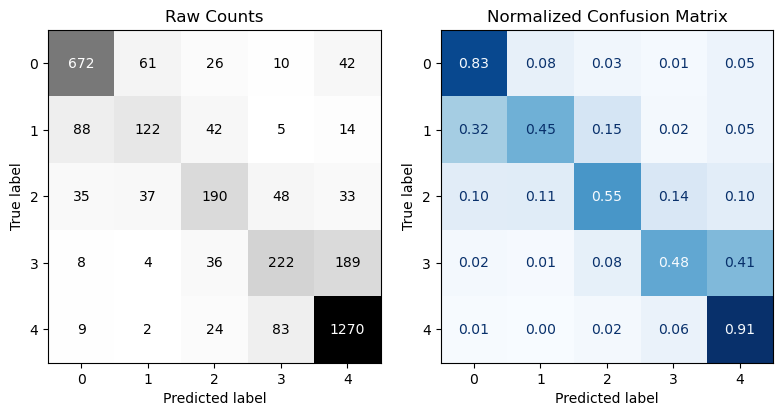

----------------------------------------------------------------------
 Classification Metrics: "test" data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       259
           1       0.51      0.41      0.45        96
           2       0.54      0.61      0.58       110
           3       0.53      0.47      0.50       146
           4       0.84      0.90      0.87       480

    accuracy                           0.74      1091
   macro avg       0.65      0.64      0.64      1091
weighted avg       0.74      0.74      0.74      1091



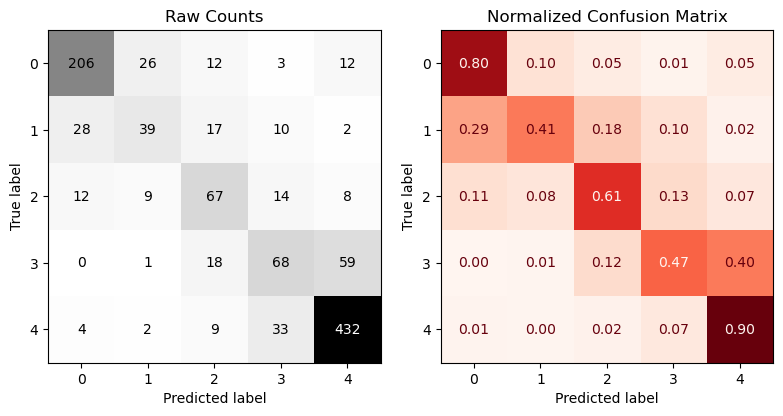

In [46]:
import dojo_ds as ds
ds.evaluate.classification_metrics(y_train_enc, y_train_pred,label='"training" data')# target_names=encoder.classes_)
ds.evaluate.classification_metrics(y_test_enc, y_pred_test, cmap="Reds",label='"test" data');# target_names=encoder.classes_)

### Binary Sentiment

In [47]:
model_name_binary = "AdamCodd/distilbert-base-uncased-finetuned-sentiment-amazon"

from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained(model_name_binary)

model = AutoModelForSequenceClassification.from_pretrained(model_name_binary)


In [48]:
X = df.dropna(subset=['target-rating'])['review-text-full']
y =  df.dropna(subset=['target-rating'])['target-rating']

In [49]:
X_train, X_test, y_train, y_test =  train_test_split(X,y )
encoder =  LabelEncoder()
y_train_enc= pd.Series(encoder.fit_transform(y_train), index=y_train.index, name=y_train.name)
y_test_enc = pd.Series(encoder.transform(y_test), index=y_test.index, name=y_test.name)

In [50]:
y_train_enc.value_counts()

0    1408
1    1070
Name: target-rating, dtype: int64

In [51]:
label_lookup = dict(zip(range(len(encoder.classes_)), encoder.classes_))
label_lookup

{0: 'High', 1: 'Low'}

In [52]:
X_train_tok = X_train.map(lambda text: tokenizer(text, padding=True, truncation=True, return_tensors="pt"))
X_test_tok = X_test.map(lambda text: tokenizer(text, padding=True, truncation=True, return_tensors="pt"))
X_train_tok

4001    [input_ids, attention_mask]
2345    [input_ids, attention_mask]
675     [input_ids, attention_mask]
2298    [input_ids, attention_mask]
607     [input_ids, attention_mask]
                   ...             
899     [input_ids, attention_mask]
3855    [input_ids, attention_mask]
2212    [input_ids, attention_mask]
2758    [input_ids, attention_mask]
4182    [input_ids, attention_mask]
Name: review-text-full, Length: 2478, dtype: object

In [53]:
train_preds  = get_preds(model, X_train_tok)

In [54]:
type(train_preds)

pandas.core.series.Series

In [55]:
train_preds.iloc[0]

0

In [56]:
encoder.classes_

array(['High', 'Low'], dtype=object)

In [57]:
y_train_enc.value_counts(1)

0    0.5682
1    0.4318
Name: target-rating, dtype: float64

In [58]:
train_preds.value_counts(1)

1    0.562954
0    0.437046
Name: Train Pred, dtype: float64

----------------------------------------------------------------------
 Classification Metrics: "training" data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.03      0.03      0.03      1408
           1       0.02      0.02      0.02      1070

    accuracy                           0.02      2478
   macro avg       0.03      0.02      0.02      2478
weighted avg       0.03      0.02      0.03      2478



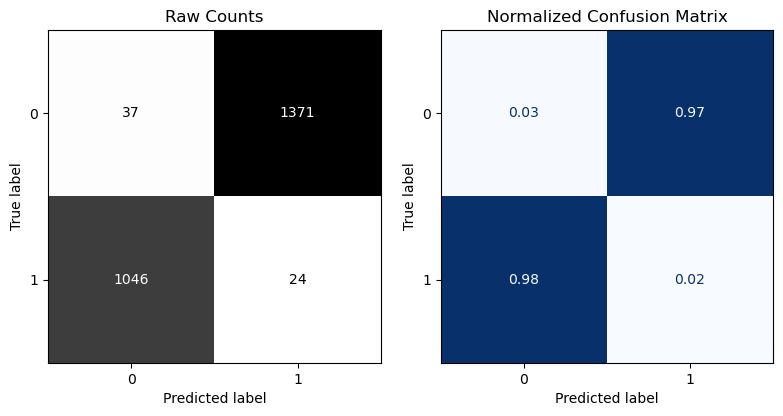

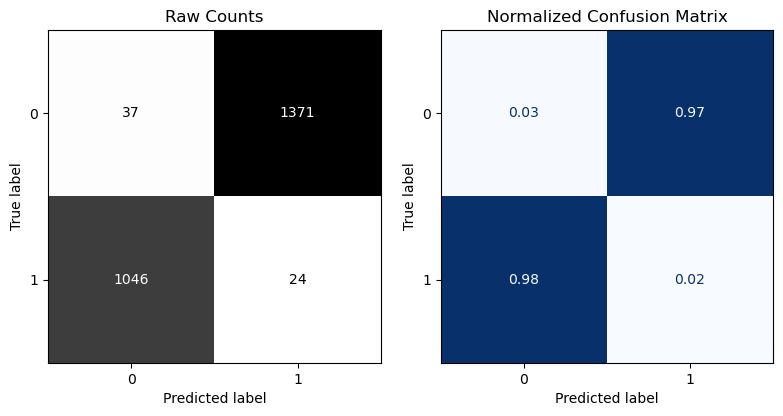

In [59]:
ds.evaluate.classification_metrics(y_train_enc, train_preds,label='"training" data')# target_names=encoder.classes_)


### Trying Pipeline

In [60]:
# !pip install -U dojo_ds


In [79]:
# %%time
# from transformers import TextClassificationPipeline

# pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, truncate=True)#,return_all_scores=True )
# preds_pipe = pipe(X_train.to_list())